# Задача 3. Вариант 16
# Клочков Владислав, 342 группа

In [118]:
import numpy as np
from sympy import diff
from sympy.abc import p
import math
import matplotlib.pyplot as plt


F = (p ** (1/4) + 2) / (p ** (1/2) - 1)

Функция вычисляющая W(f,t)

In [119]:
cache_diff = [diff(F, p, 1)]
def W(n, t: float):
    if len(cache_diff) < n:
        for i in range(n - len(cache_diff)):
            cache_diff.append(diff(cache_diff[-1], p, 1))
    differ = cache_diff[n - 1].evalf(subs={p: n / t})
    return (-1)**(n % 2) * (n / t)**(n + 1)  * differ / math.factorial(n)

Вычисление методом Виддера без ускорения сходимости и вывод количества итерация для получения точности epsilon = 0.001

In [120]:
n = 1
t = 0.5
epsilon = 0.001
delta = None
prev_num = W(n, t)

while delta is None or delta > epsilon:
    n += 1
    new_num = W(n, t)
    delta = abs(prev_num - new_num)
    prev_num = new_num

print(f"n = {n}")



n = 80


In [66]:
x_line = np.linspace(1, 100, 1000)
default_line = np.array([W(n, x) for x in x_line])

Реализация метода Виддера с ускорением

In [45]:
def W_boost(n, k, t):
    test = [5 * i + 1 for i in range(k)]
    D = sorted([rnd / n for rnd in test])
    C = []

    for j in range(k):
        ans = 1
        for i in range(n):
            if i == j:
                continue
            ans *= D[j] / (D[j] - D[i])
        C.append(ans)

    ans = 0
    for i in range(k):
        ans += C[i] * W(int(n * D[i]), t)
    return ans

Вывод количества шагов для получения точности epsilon = 0.001

In [67]:
n_boost = 1
t = 0.5
delta_boost = None
prev_num_boost = W_boost(n_boost, n_boost, t)

while delta_boost is None or delta_boost > epsilon:
    n_boost += 1
    new_num = W_boost(n_boost, n_boost, t)
    delta_boost = abs(prev_num_boost - new_num)
    prev_num_boost = new_num


print(f"n = {n_boost}")

n = 6


In [ ]:
boost_line = np.array([W_boost(n_boost, n_boost, x) for x in x_line])
print(f"n = {n_boost}")

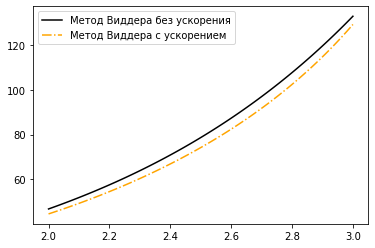

In [121]:
#(2,3]
x_line = np.linspace(2, 3, 100)
default_line = np.array([W(n, x) for x in x_line])

boost_line = np.array([W_boost(n_boost, n_boost, x) for x in x_line])

plt.plot(x_line, default_line, "-", color = 'black', label="Метод Виддера без ускорения")
plt.plot(x_line, boost_line, "-.", color = 'orange', label="Метод Виддера с ускорением")
plt.legend()
plt.show()

Вывод графиков для обоих методов

<ipython-input-119-b8960bc8bd27>:6: RuntimeWarning: divide by zero encountered in double_scalars
  differ = cache_diff[n - 1].evalf(subs={p: n / t})
<ipython-input-119-b8960bc8bd27>:7: RuntimeWarning: divide by zero encountered in double_scalars
  return (-1)**(n % 2) * (n / t)**(n + 1)  * differ / math.factorial(n)


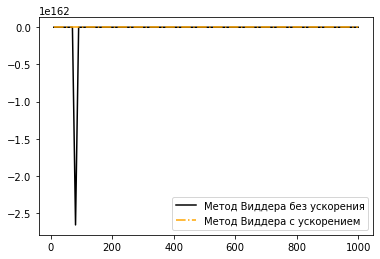

In [122]:
#(0,1000]
x_line = np.linspace(0, 1000, 100)
default_line = np.array([W(n, x) for x in x_line])

boost_line = np.array([W_boost(n_boost, n_boost, x) for x in x_line])

plt.plot(x_line, default_line, "-", color = 'black', label="Метод Виддера без ускорения")
plt.plot(x_line, boost_line, "-.", color = 'orange', label="Метод Виддера с ускорением")
plt.legend()
plt.show()

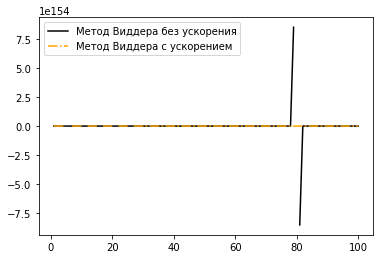

In [123]:
#(1,100]
x_line = np.linspace(1, 100, 100)
default_line = np.array([W(n, x) for x in x_line])

boost_line = np.array([W_boost(n_boost, n_boost, x) for x in x_line])

plt.plot(x_line, default_line, "-", color = 'black', label="Метод Виддера без ускорения")
plt.plot(x_line, boost_line, "-.", color = 'orange', label="Метод Виддера с ускорением")
plt.legend()
plt.show()

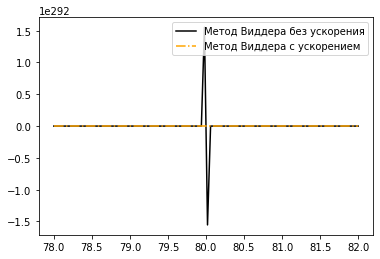

In [106]:
#(78,82] 
x_line = np.linspace(78, 82, 100)
default_line = np.array([W(n, x) for x in x_line])

boost_line = np.array([W_boost(n_boost, n_boost, x) for x in x_line])

plt.plot(x_line, default_line, "-", color = 'black', label="Метод Виддера без ускорения")
plt.plot(x_line, boost_line, "-.", color = 'orange', label="Метод Виддера с ускорением")
plt.legend()
plt.show()

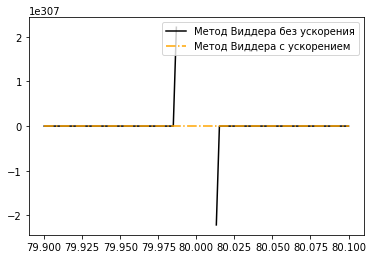

In [107]:
#(79.9,80.1] 
x_line = np.linspace(79.9, 80.1, 100)
default_line = np.array([W(n, x) for x in x_line])

boost_line = np.array([W_boost(n_boost, n_boost, x) for x in x_line])

plt.plot(x_line, default_line, "-", color = 'black', label="Метод Виддера без ускорения")
plt.plot(x_line, boost_line, "-.", color = 'orange', label="Метод Виддера с ускорением")
plt.legend()
plt.show()

<ipython-input-41-b8960bc8bd27>:7: RuntimeWarning: overflow encountered in double_scalars
  return (-1)**(n % 2) * (n / t)**(n + 1)  * differ / math.factorial(n)


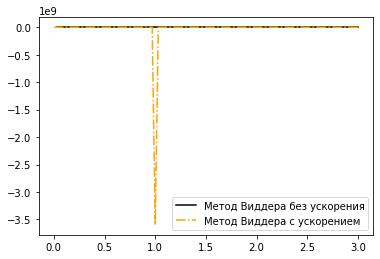

In [109]:
#(0,3] 
x_line = np.linspace(0.0000001, 3, 100)
default_line = np.array([W(n, x) for x in x_line])

boost_line = np.array([W_boost(n_boost, n_boost, x) for x in x_line])

plt.plot(x_line, default_line, "-", color = 'black', label="Метод Виддера без ускорения")
plt.plot(x_line, boost_line, "-.", color = 'orange', label="Метод Виддера с ускорением")
plt.legend()
plt.show()

<ipython-input-41-b8960bc8bd27>:7: RuntimeWarning: overflow encountered in double_scalars
  return (-1)**(n % 2) * (n / t)**(n + 1)  * differ / math.factorial(n)


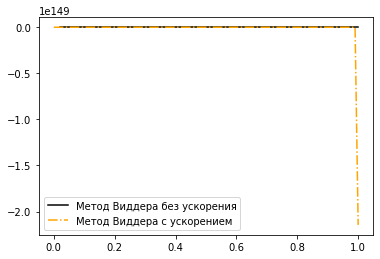

In [110]:
#(0,1] 
x_line = np.linspace(0.0000001, 1, 100)
default_line = np.array([W(n, x) for x in x_line])

boost_line = np.array([W_boost(n_boost, n_boost, x) for x in x_line])

plt.plot(x_line, default_line, "-", color = 'black', label="Метод Виддера без ускорения")
plt.plot(x_line, boost_line, "-.", color = 'orange', label="Метод Виддера с ускорением")
plt.legend()
plt.show()

<ipython-input-41-b8960bc8bd27>:7: RuntimeWarning: overflow encountered in double_scalars
  return (-1)**(n % 2) * (n / t)**(n + 1)  * differ / math.factorial(n)


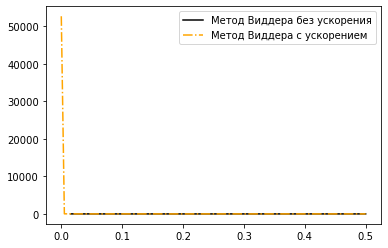

In [111]:
#(0,0.5] 
x_line = np.linspace(0.0000001, 0.5, 100)
default_line = np.array([W(n, x) for x in x_line])

boost_line = np.array([W_boost(n_boost, n_boost, x) for x in x_line])

plt.plot(x_line, default_line, "-", color = 'black', label="Метод Виддера без ускорения")
plt.plot(x_line, boost_line, "-.", color = 'orange', label="Метод Виддера с ускорением")
plt.legend()
plt.show()

<ipython-input-41-b8960bc8bd27>:7: RuntimeWarning: overflow encountered in double_scalars
  return (-1)**(n % 2) * (n / t)**(n + 1)  * differ / math.factorial(n)


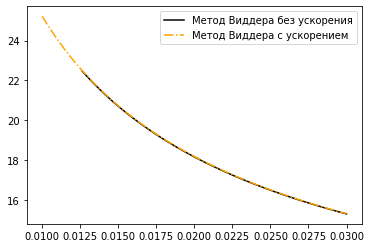

In [114]:
#(0.01, 0.03] 
x_line = np.linspace(0.01, 0.03, 100)
default_line = np.array([W(n, x) for x in x_line])

boost_line = np.array([W_boost(n_boost, n_boost, x) for x in x_line])

plt.plot(x_line, default_line, "-", color = 'black', label="Метод Виддера без ускорения")
plt.plot(x_line, boost_line, "-.", color = 'orange', label="Метод Виддера с ускорением")
plt.legend()
plt.show()

<ipython-input-41-b8960bc8bd27>:7: RuntimeWarning: overflow encountered in double_scalars
  return (-1)**(n % 2) * (n / t)**(n + 1)  * differ / math.factorial(n)


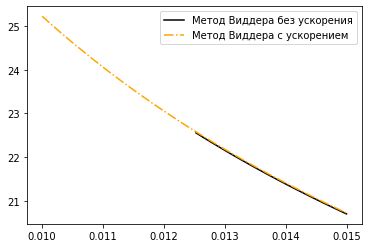

In [116]:
#(0.01, 0.015] 
x_line = np.linspace(0.01, 0.015, 100)
default_line = np.array([W(n, x) for x in x_line])

boost_line = np.array([W_boost(n_boost, n_boost, x) for x in x_line])

plt.plot(x_line, default_line, "-", color = 'black', label="Метод Виддера без ускорения")
plt.plot(x_line, boost_line, "-.", color = 'orange', label="Метод Виддера с ускорением")
plt.legend()
plt.show()

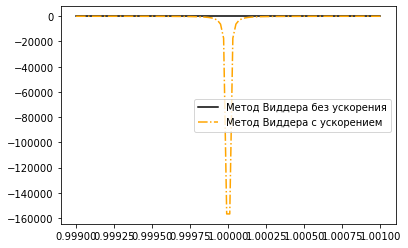

In [115]:
#(1-eps,1+eps] 
x_line = np.linspace(1-epsilon, 1+epsilon, 100)
default_line = np.array([W(n, x) for x in x_line])

boost_line = np.array([W_boost(n_boost, n_boost, x) for x in x_line])

plt.plot(x_line, default_line, "-", color = 'black', label="Метод Виддера без ускорения")
plt.plot(x_line, boost_line, "-.", color = 'orange', label="Метод Виддера с ускорением")
plt.legend()
plt.show()

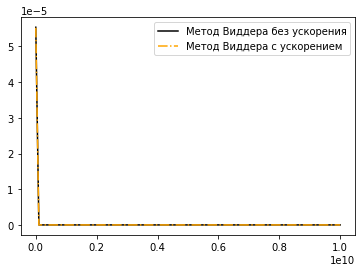

In [137]:
#(1000,10000] 
x_line = np.linspace(1000,10000000000, 100)
default_line = np.array([W(n, x) for x in x_line])

boost_line = np.array([W_boost(n_boost, n_boost, x) for x in x_line])

plt.plot(x_line, default_line, "-", color = 'black', label="Метод Виддера без ускорения")
plt.plot(x_line, boost_line, "-.", color = 'orange', label="Метод Виддера с ускорением")
plt.legend()
plt.show()